# Assignment 6:  Due Thursday 10/10

In this assignment you will become familiar with the Pandas library through the exploration of a Nobel prize data set. 

This data set was taken from the Kaggle website (https://www.kaggle.com/). If you are interested in data science and / or analysis, this website offers tons of data sets in various formats that you can access. They even post compititions that you can enter, some with money prizes awarded.

The libraries needed for this assignment are listed below.

In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# 1a)

Read in the data set 'data/nobel.csv' into a DataFrame using Pandas .

In [314]:
df=pd.read_csv('/Users/Maxwe/Desktop/Scientific Computing II 2024/nobel.csv')

# 1b)

Display below the output from the DataFrame functions *info*.

In [317]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 

# 1c)

Show the first 5 listings of the dataset.

In [361]:
print("The first 5 entries are:")
print(df.head())

The first 5 entries are:
   year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  laureate_id  \
0  "in recognition of the extraordinary services ...         1/1          160   
1  "in special recognition of his poetic composit...         1/1          569   
2  "for his work on serum therapy, especially its...         1/1          293   
3                                                NaN         1/2          462   
4                                                NaN         1/2          463   

  laureate_type                     full_name birth_date     

# Problem 2

How many null ('NaN') values there are in each *catagory*? What is the total number of Null values in the DataFrame?

In [406]:
print("The total number of null values per category:",df.isnull().sum(),"\nActual total number of null values:",df.isnull().sum().sum())

The total number of null values per category: year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
gender_numeric           26
birth_year               28
death_year              318
age                     318
dtype: int64 
Actual total number of null values: 2602


# Problem 3

Make a histogram of the number of nobel prizes awarded per year. Around which decade (1900, 1910, 1920, ...) were the least amount of prizes awarded?

The prizes per year were:
 year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2012    10
2013    13
2014    13
2015    11
2016    11
Name: count, Length: 113, dtype: int64 
The least amount of prizes according to the data was around WWII (1939-1945)


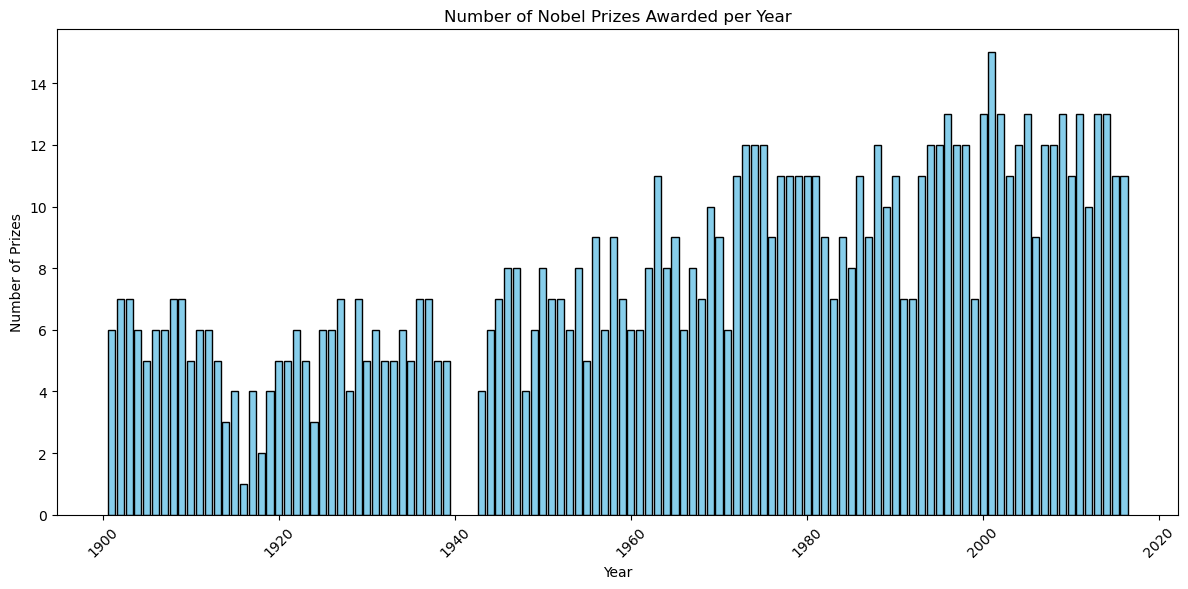

In [408]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')
if not df['year'].dropna().empty:
    df['year'] = df['year'].astype(int) 
    prizes_per_year = df['year'].value_counts().sort_index()
    print("The prizes per year were:\n",prizes_per_year,"\nThe least amount of prizes according to the data was around WWII (1939-1945)")
    plt.figure(figsize=(12, 6))
    plt.bar(prizes_per_year.index, prizes_per_year.values, color='skyblue', edgecolor='black')
    plt.title('Number of Nobel Prizes Awarded per Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Prizes')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    #this was very helpful for debugging
    print("No valid years found in the 'year' column.")

# Problem 4

Use groupby method to printout the number of prizes awarded to each category. Which categroy has the most prizes?

In [384]:
prizes_per_category=df.groupby('category').size()
print("Prizes awarded per category are:\n",prizes_per_category)

Prizes awarded per category are:
 category
Chemistry     175
Economics      78
Literature    113
Medicine      211
Peace         130
Physics       204
dtype: int64


# Problem 5

Find percentage of the prizes were awarded to 1, 2, 3, and 4 people? Meaning what percentage of 1/1, 1/2, 1/3, and 1/4 prize_shares are there?

In [388]:
share_counts=df['prize_share'].value_counts(normalize=True)*100
print("Percentage of prizes shared by 1, 2, 3, and 4 people is:\n", share_counts)

Percentage of prizes shared by 1, 2, 3, and 4 people is:
 prize_share
1/1    37.760703
1/2    33.589462
1/3    22.063666
1/4     6.586169
Name: proportion, dtype: float64


# Problem 6

Determine how many males and females won the prize. Does the sum of male and female prizes add up to the total entries? If not, why?

On the same graph make histograms for the numbber of males and females that won the prize each year. 

In [400]:
gender_counts=df['sex'].value_counts()
print("Number of male and female prize winners:\n", gender_counts,"\nDoes the sum of male and female entries match the total?","\nTotal entries:", len(df),"\nSum of male and female:", gender_counts.sum(),"\nNo, it does not match")

Number of male and female prize winners:
 sex
Male      836
Female     49
Name: count, dtype: int64 
Does the sum of male and female entries match the total? 
Total entries: 911 
Sum of male and female: 885 
No, it does not match


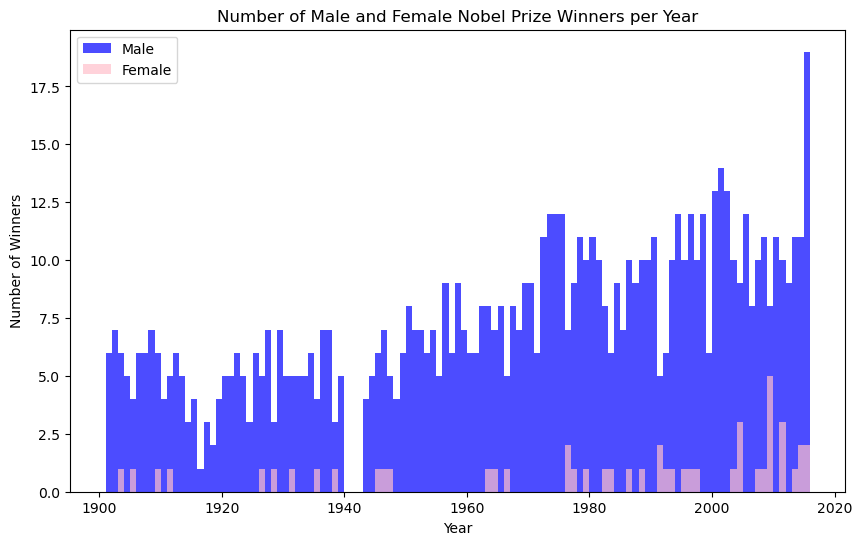

In [410]:
gender_counts = df['sex'].value_counts()
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['gender_numeric'] = df['sex'].map({'Male': 1, 'Female': 0})
male_counts = []
female_counts = []
years = []
for index, row in df.iterrows():
    if row['gender_numeric'] == 1:  
        male_counts.append(row['year'])  
    elif row['gender_numeric'] == 0:  
        female_counts.append(row['year'])  
    if pd.notna(row['year']):  # Check if year is not NaN
        years.append(row['year'])
male_counts = [int(year) for year in male_counts if pd.notna(year)]
female_counts = [int(year) for year in female_counts if pd.notna(year)]
plt.figure(figsize=(10, 6))
plt.hist(male_counts, bins=range(int(min(years)), int(max(years)) + 1), alpha=0.7, label='Male', color='blue')
plt.hist(female_counts, bins=range(int(min(years)), int(max(years)) + 1), alpha=0.7, label='Female', color='pink')
plt.title('Number of Male and Female Nobel Prize Winners per Year')
plt.xlabel('Year')
plt.ylabel('Number of Winners')
plt.legend()
plt.show()

# Problem 7

How many prizes were won by those whose birth country was United States of America?

In [413]:
usa_winners = df[df['birth_country'] == 'United States of America']
print("\nNumber of Nobel Prizes won by people born in the USA:\n",len(usa_winners))


Number of Nobel Prizes won by people born in the USA:
 259


# Problem 8

Determine the age that each of the prize winners was when they won the prize. Find the youngest and oldest to win the prize. Find the mean age to win the prize, and the standard deviation of it. Make a histogram of the age each person was when they won the prize.

### Hint: You can use Pandas DatetimeIndex method to extract the year from the date format yyyy-mm-dd
> pd.DatetimeIndex(date).year

Where *date* is given in a formate like year-month-day, the above will returen the year, hence the *.year* in the call above. Use 'shit+tab' on pandas.DatetimeIndex to learn more.

In [425]:
df['birth_date']=pd.to_datetime(df['birth_date'],errors='coerce')  
df['death_date']=pd.to_datetime(df['death_date'],errors='coerce')  
df['birth_year']=df['birth_date'].dt.year  
df['death_year']=df['death_date'].dt.year  
df['age']=df['death_year']-df['birth_year']  
print("\nThe youngest Nobel Prize winner's age was:\n",df['age'].min(),"\nVersus the oldest Nobel Prize winner's age:\n",df['age'].max(),"\nWith a mean age of Nobel Prize winners:\n",df['age'].mean(),"\nIts standard deviation of age:\n",df['age'].std())


The youngest Nobel Prize winner's age was:
 39.0 
Versus the oldest Nobel Prize winner's age:
 103.0 
With a mean age of Nobel Prize winners:
 79.93591905564924 
Its standard deviation of age:
 10.756484917351992


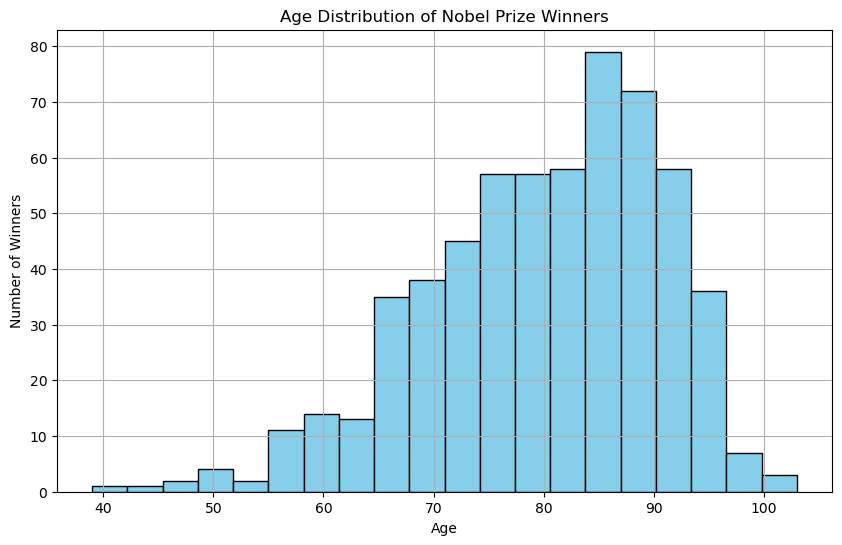

In [351]:
plt.figure(figsize=(10, 6))
df['age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Nobel Prize Winners')
plt.xlabel('Age')
plt.ylabel('Number of Winners')
plt.show()

# Problem 9

Make a copy of the current DataFrame. Then drop the column *lauret_id* from the copied DataFrame (do this inplace so this column is gone).

In [427]:
df_copy=df.copy()
df_copy.drop('laureate_id',axis=1,inplace=True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   year                  911 non-null    int32         
 1   category              911 non-null    object        
 2   prize                 911 non-null    object        
 3   motivation            823 non-null    object        
 4   prize_share           911 non-null    object        
 5   laureate_type         911 non-null    object        
 6   full_name             911 non-null    object        
 7   birth_date            883 non-null    datetime64[ns]
 8   birth_city            883 non-null    object        
 9   birth_country         885 non-null    object        
 10  sex                   885 non-null    object        
 11  organization_name     665 non-null    object        
 12  organization_city     667 non-null    object        
 13  organization_country

# Problem 10

Add the age column you calculated in Problem 8 to the DataFrame.

In [429]:
df_copy['age']=df['age']

In [431]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   year                  911 non-null    int32         
 1   category              911 non-null    object        
 2   prize                 911 non-null    object        
 3   motivation            823 non-null    object        
 4   prize_share           911 non-null    object        
 5   laureate_type         911 non-null    object        
 6   full_name             911 non-null    object        
 7   birth_date            883 non-null    datetime64[ns]
 8   birth_city            883 non-null    object        
 9   birth_country         885 non-null    object        
 10  sex                   885 non-null    object        
 11  organization_name     665 non-null    object        
 12  organization_city     667 non-null    object        
 13  organization_country